## Prediction with one of the contracts from the dataset

In [1]:
from scripts.predict import run_prediction
import json

In [2]:
import json

with open('./cuad-data/CUADv1.json',encoding ="utf8") as json_file:
    data = json.load(json_file)

In [3]:
questions = []
for i, q in enumerate(data['data'][0]['paragraphs'][0]['qas']):
    question = data['data'][0]['paragraphs'][0]['qas'][i]['question']
    questions.append(question)
contract = data['data'][4]['paragraphs'][0]['context']
print(type(contract))
print(type(questions))
#print(contract)

<class 'str'>
<class 'list'>


Runing only one question

In [8]:
predictions = run_prediction(questions[0], contract, '/home/mneo/CUAD_Demo_MaBe/cuad-models/roberta-base')
#print("Answer: " + predictions.strip())

add example index and unique id: 100%|██████████| 107/107 [00:00<00:00, 379366.46it/s]


In [12]:
questions[0]

'Highlight the parts (if any) of this contract related to "Document Name". Details: The name of the contract'

In [7]:
predictions = run_prediction(questions, contract, 'cuad-models/roberta-base/')

add example index and unique id: 100%|██████████| 41/41 [00:00<?, ?it/s]


In [8]:
print(predictions)

OrderedDict([('0', 'JOINT FILING AGREEMENT'), ('1', 'Co-Trustee'), ('2', 'March 27, 2020.'), ('3', 'March 27, 2020.'), ('4', ''), ('5', ''), ('6', ''), ('7', ''), ('8', ''), ('9', ''), ('10', ''), ('11', ''), ('12', ''), ('13', ''), ('14', ''), ('15', ''), ('16', ''), ('17', ''), ('18', ''), ('19', ''), ('20', ''), ('21', ''), ('22', ''), ('23', ''), ('24', "The undersigned hereby agree to jointly prepare and file with the applicable regulatory authorities this Schedule 13G or Schedule 13D and any future amendments thereto reporting each of the undersigned's ownership of securities of the issuer named herein, and hereby affirm that such Schedule 13G or Schedule 13D is being filed on behalf of each of the undersigned pursuant to and in accordance with the provisions of Rule 13d-1(k) under the Securities Exchange Act of 1934."), ('25', ''), ('26', ''), ('27', ''), ('28', ''), ('29', ''), ('30', ''), ('31', ''), ('32', ''), ('33', ''), ('34', ''), ('35', ''), ('36', ''), ('37', ''), ('38'

Prediction as a list

In [10]:
pred_list = [] 
for i, p in enumerate(predictions):
    if i != 0: pred_list.append(predictions[p])
print(pred_list)

['Co-Trustee', 'March 27, 2020.', 'March 27, 2020.', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', "The undersigned hereby agree to jointly prepare and file with the applicable regulatory authorities this Schedule 13G or Schedule 13D and any future amendments thereto reporting each of the undersigned's ownership of securities of the issuer named herein, and hereby affirm that such Schedule 13G or Schedule 13D is being filed on behalf of each of the undersigned pursuant to and in accordance with the provisions of Rule 13d-1(k) under the Securities Exchange Act of 1934.", '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


## Tesseract implementation

<class 'str'>


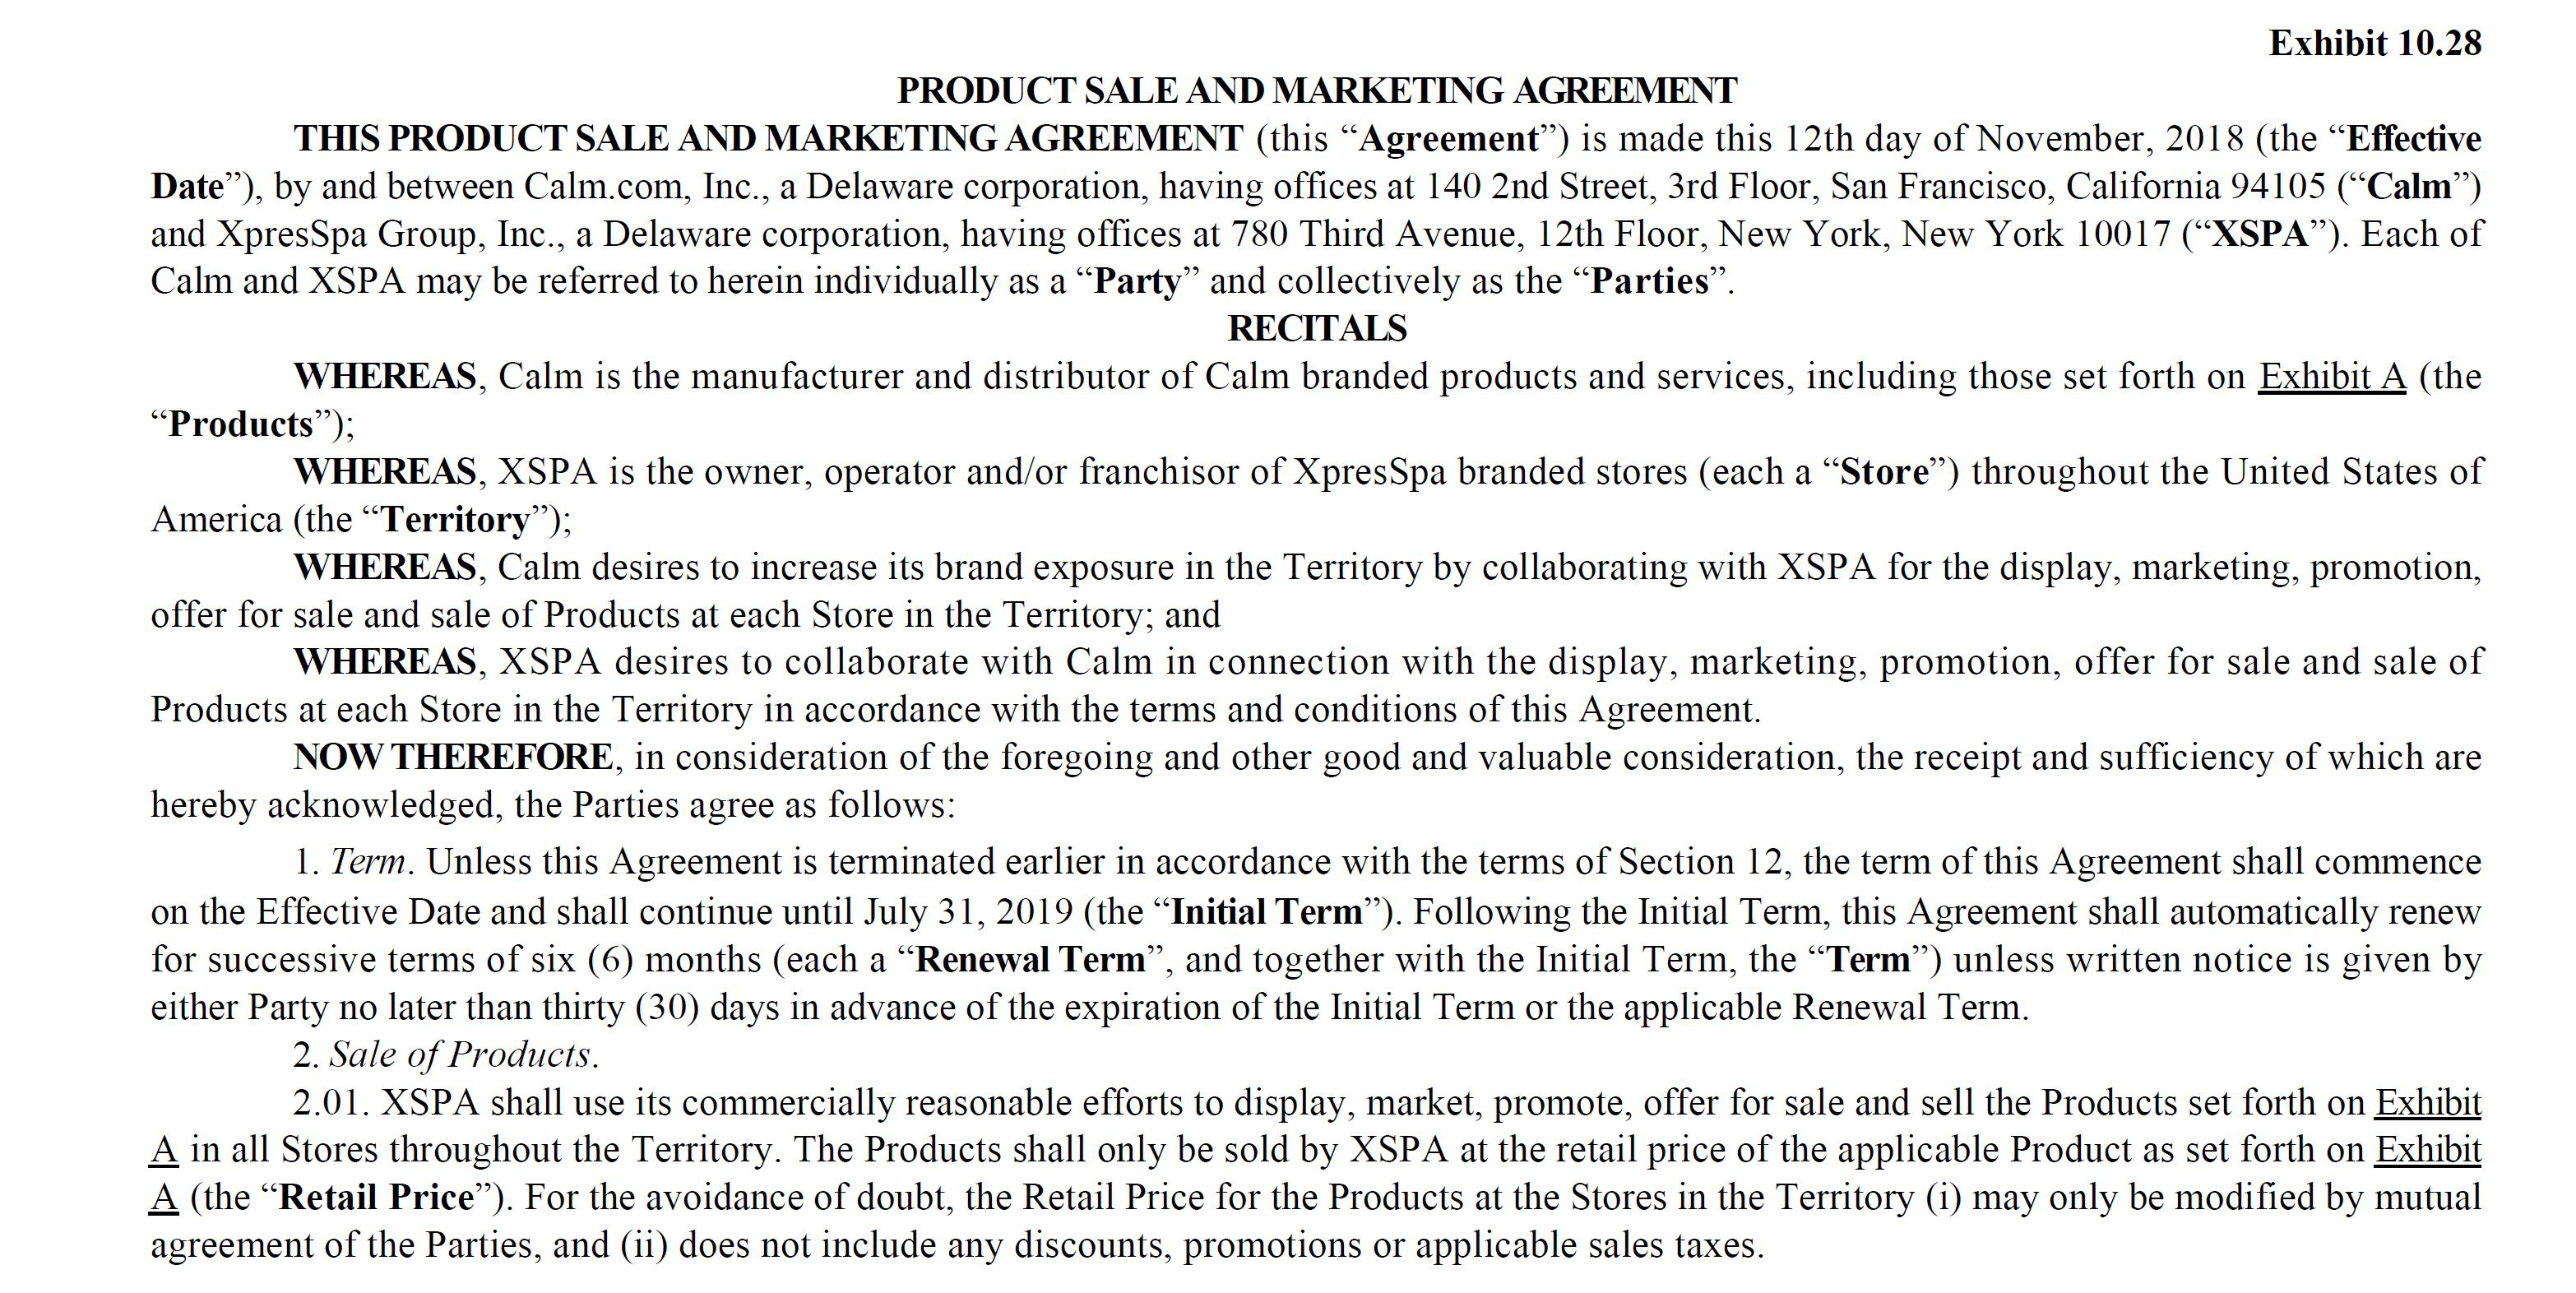

In [13]:
from PIL import Image     
import pytesseract   
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\mbene\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
path = r'C:\Users\mbene\github\CUAD_Demo_MaBe\image3.jpg' 
image= Image.open(path) 
contract = pytesseract.image_to_string(image)
print(type(contract))
image

In [14]:
predictions = run_prediction(questions, contract, 'cuad-models/roberta-base/')
print(predictions)

add example index and unique id: 100%|██████████| 41/41 [00:00<00:00, 40837.44it/s]


OrderedDict([('0', 'PRODUCT SALE AND MARKETING AGREEMENT'), ('1', 'Calm.com, Inc.,'), ('2', '12th day of November, 2018'), ('3', '12th day of November, 2018'), ('4', 'Unless this Agreement is terminated earlier in accordance with the terms of Section 12, the term of this Agreement shall commence on the Effective Date and shall continue until July 31, 2019 (the “Initial Term”).'), ('5', 'Following the Initial Term, this Agreement shall automatically renew for successive terms of six (6) months (each a “Renewal Term”, and together with the Initial Term, the “Term’?) unless written notice is given by either Party no later than thirty (30) days in advance of the expiration of the Initial Term or the applicable Renewal Term.'), ('6', 'Following the Initial Term, this Agreement shall automatically renew for successive terms of six (6) months (each a “Renewal Term”, and together with the Initial Term, the “Term’?) unless written notice is given by either Party no later than thirty (30) days i

Changing the questions

In [16]:
# import pandas as pd
# df = pd.DataFrame(questions) 
# df.to_csv (r'./questions2.csv', index = None)

In [17]:
# import pandas as pd
# df = pd.read_csv ('./questions2.csv')
# questions2 = df.values.tolist()
# print(df)

                                                    0
0   Highlight the parts (if any) of this contract ...
1   Highlight the parts (if any) of this contract ...
2   Highlight the parts (if any) of this contract ...
3   Highlight the parts (if any) of this contract ...
4   Highlight the parts (if any) of this contract ...
5   Highlight the parts (if any) of this contract ...
6   Highlight the parts (if any) of this contract ...
7   Highlight the parts (if any) of this contract ...
8   Highlight the parts (if any) of this contract ...
9   Highlight the parts (if any) of this contract ...
10  Highlight the parts (if any) of this contract ...
11  Highlight the parts (if any) of this contract ...
12  Highlight the parts (if any) of this contract ...
13  Highlight the parts (if any) of this contract ...
14  Highlight the parts (if any) of this contract ...
15  Highlight the parts (if any) of this contract ...
16  Highlight the parts (if any) of this contract ...
17  Highlight the parts (if 

In [18]:
import json

questions2 = ['Document Name:','Parties:','Agreement Date:','Effective Date:','Expiration Date:','Renewal Term:','Notice Period To Terminate Renewal:','Governing Law:','Most Favored Nation:','Non-Compete:','Exclusivity:','No-Solicit Of Customers:','Competitive Restriction Exception:','No-Solicit Of Employees:','Non-Disparagement:','Termination For Convenience:','Right of First Refusal, Offer or Negotiation (ROFR/ROFO/ROFN):','Change Of Control:','Anti-Assignment:','Revenue/Profit Sharing:','Price Restrictions:','Minimum Commitment:','Volume Restriction:','Ip Ownership Assignment:','Joint Ip Ownership:','License Grant:','Non-Transferable License:','Affiliate License-Licensor:','Affiliate License-Licensee:','Unlimited/All-You-Can-Eat-License:','Irrevocable Or Perpetual License:','Source Code Escrow:','Post-Termination Services:','Audit Rights:','Uncapped Liability:','Cap On Liability:','Liquidated Damages:','Warranty Duration:','Insurance:','Covenant Not To Sue:','Third Party Beneficiary:']

In [19]:
with open('temp/contract.txt', 'w') as f:
    f.write(' '.join(contract.split()))

In [20]:
with open('temp/predictions.txt', 'w') as f:
    for i, p in enumerate(predictions):
        f.write(f"{i+1}){questions2[int(p)]}\n   {predictions[p]} \n")

In [21]:
pred_list = [] 
for i, p in enumerate(predictions):
    if i != 0: pred_list.append(predictions[p])
print(pred_list)

['Calm.com, Inc.,', '12th day of November, 2018', '12th day of November, 2018', 'Unless this Agreement is terminated earlier in accordance with the terms of Section 12, the term of this Agreement shall commence on the Effective Date and shall continue until July 31, 2019 (the “Initial Term”).', 'Following the Initial Term, this Agreement shall automatically renew for successive terms of six (6) months (each a “Renewal Term”, and together with the Initial Term, the “Term’?) unless written notice is given by either Party no later than thirty (30) days in advance of the expiration of the Initial Term or the applicable Renewal Term.', 'Following the Initial Term, this Agreement shall automatically renew for successive terms of six (6) months (each a “Renewal Term”, and together with the Initial Term, the “Term’?) unless written notice is given by either Party no later than thirty (30) days in advance of the expiration of the Initial Term or the applicable Renewal Term.', '', '', '', '', ''

In [28]:
# Reading pdf with Pdf filereader
from PyPDF2 import PdfFileReader
def read_pdf(file):
	pdfReader = PdfFileReader(file)
	count = pdfReader.numPages
	all_page_text = ""
	for i in range(count):
		page = pdfReader.getPage(i)
		all_page_text += page.extractText()
	return all_page_text

In [34]:
from PyPDF2 import PdfFileReader
print(read_pdf(r'MarketingAgreement.pdf'))

In [37]:
# no funciona en windows
# Reading an entire pdf with pdfplumber
import pdfplumber

with pdfplumber.open('MarketingAgreement.pdf') as pdf:
    #page = pdf.pages[1] 
    #print(page.extract_text())
    #print(len(pdf.pages))
    allpages= ''
    for i in range (len(pdf.pages)):
        page = pdf.pages[i]
        allpages += page.extract_text()

print(allpages)

AttributeError: 'LTChar' object has no attribute 'graphicstate'

In [39]:
#from PyPDF2 import PdfFileReader
#read_pdf('MarketingAgreement.pdf')

from PyPDF2 import PdfFileReader

pdfReader = PdfFileReader('MarketingAgreement.pdf')
count = pdfReader.numPages
all_page_text = ""

for i in range(count):
    page = pdfReader.getPage(i)
    all_page_text += page.extractText()

print(all_page_text)
print(count)


23


In [ ]:
#Load images
def load_image(file):
	img = Image.open(file)
	return img

In [ ]:
from collections import OrderedDict
from itertools import islice
o = OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])
sliced = islice(o.items(), 5)  # o.iteritems() is o.items() in Python 3
sliced_o = OrderedDict(sliced)
print(sliced_o)

In [ ]:
import pandas as pd

df = pd.DataFrame (predictions, columns = ['product_name'])
print (df)